# FILE FÜR DIE SOLLWERTE ZUERST DURCHLAUFEN LASSEN, UM --- process_data_df11.csv --- ZU ERZEUGEN!!!!!

In [1]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
import sklearn
import csv

In [2]:
# Daten einlesen
df=pd.read_csv("process_data_df11.csv", header=[0,1], na_values=['nan'],
sep=',',low_memory=False)

# Spalte ohne Information löschen
df2=df.drop(['Unnamed: 0_level_0'],axis=1)


df2.head()

/home/alpha/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


ps                                                             \
             ps    ps_datum ps_beschichtete_rollenlange_m ps_c_losung_wt_%   
0  cb031d4b18ff  2018-05-13                        4487.0             31.0   
1  cb031d4b18ff  2018-05-13                        4487.0             31.0   
2  cb031d4b18ff  2018-05-13                        4487.0             31.0   
3  cb031d4b18ff  2018-05-13                        4487.0             31.0   
4  cb031d4b18ff  2018-05-13                        4487.0             31.0   

                                                                       \
  ps_gap_micro_m ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3   
0          250.0               136.0      136.0      134.0      134.0   
1          250.0               136.0      136.0      134.0      134.0   
2          250.0               136.0      136.0      134.0      134.0   
3          250.0               136.0      136.0      134.0      134.0   
4          250.0               136.0      136.0      134.0      134.0   

              ...             qc                                            \
  ps_dicke_4  ... qc_flux_l/m2/h qc_a-value_l/m2/h/bar qc_b-value_m/s_10-6   
0      135.0  ...      40.286235              4.625285            3.678446   
1      135.0  ...      40.252401              4.621401            3.165247   
2      135.0  ...      39.718186              4.560067            3.170593   
3      135.0  ...      39.441426              4.528292            2.855092   
4      135.0  ...      39.731817              4.561632            2.810373   

                                                    Sollwerte  \
  qc_flux_m3/m2/day sum_of_scrap roll_position soll_salzr_abs   
0          0.966870          0.0     58.181818           99.5   
1          0.966058          0.0    116.363636           99.5   
2          0.953236          0.0    174.545455           99.5   
3          0.946594          0.0    232.727273           99.5   
4          0.953564          0.0    290.909091           99.5   

                                                      
  soll_permeatd_abs soll_salzr_rel soll_permeatd_rel  
0              36.2       0.045087          1.707208  
1              36.2       0.030558          1.621790  
2              36.2       0.023437          0.273103  
3              36.2       0.067889          0.425610  
4              36.2       0.077781          0.307515  

[5 rows x 347 columns]

In [3]:
df3=df2.copy()

In [4]:
df3=df3.select_dtypes(include=['float64','int']) 

In [6]:
df3=df3[(df3['Sollwerte']['soll_salzr_rel']>10) & (df3['Sollwerte']['soll_salzr_rel']<100) ]

In [7]:
df3_ps=df3.drop(columns=['pa','ass','qc'])
df3_pa=df3.drop(columns=['ps','ass','qc'])
df3_ass=df3.drop(columns=['ps','pa','qc'])
df3_qc=df3.drop(columns=['ps','pa','ass'])
df3_ps.head()

ps                                  \
     ps_beschichtete_rollenlange_m ps_c_losung_wt_% ps_gap_micro_m   
412                         4509.0             31.0          250.0   
1239                        4496.0             31.0          250.0   
2109                        4512.0             31.0          250.0   
2663                        4460.0             31.0          250.0   
4156                        4485.0             31.0          250.0   

                                                                      \
     ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3 ps_dicke_4   
412                139.0      138.0      138.0      137.0      135.0   
1239               138.0      138.0      135.0      135.0      133.0   
2109               135.0      135.0      133.0      133.0      132.0   
2663               137.0      135.0      136.0      135.0      135.0   
4156               137.0      136.0      135.0      136.0      135.0   

                                             ...  \
     ps_dicke_bs ps_raum_temperatur_start_c  ...   
412        135.0                       24.0  ...   
1239       132.0                       24.0  ...   
2109       133.0                       24.0  ...   
2663       136.0                       24.5  ...   
4156       134.0                       24.0  ...   

                                           \
     ps_auftragswerk_feuchtigkeit_3600m_%   
412                                  60.0   
1239                                 76.0   
2109                                 58.0   
2663                                 58.0   
4156                                 66.0   

                                                               \
     ps_auftragswerk_feuchtigkeit_4200m_% ps_out_m ps_scrap_%   
412                                  56.0   2259.0   1.978261   
1239                                 76.0   4496.0   2.260870   
2109                                 58.0   4012.0   1.913043   
2663                                 58.0   4460.0   3.043478   
4156                                 67.0   4485.0   2.500000   

                                                   Sollwerte  \
     ps_f_auftragswerk_median ps_dicke_median soll_salzr_abs   
412                      71.5           137.5           99.7   
1239                     75.5           135.0           99.5   
2109                     58.5           133.0           99.5   
2663                     59.0           135.0           99.5   
4156                     66.0           135.5           99.5   

                                                         
     soll_permeatd_abs soll_salzr_rel soll_permeatd_rel  
412                8.9      14.231245         40.341257  
1239              41.5      10.239728         27.821258  
2109              41.5      20.893209         72.415505  
2663              42.6      74.034759        242.650537  
4156              41.5      11.439460         28.638055  

[5 rows x 37 columns]

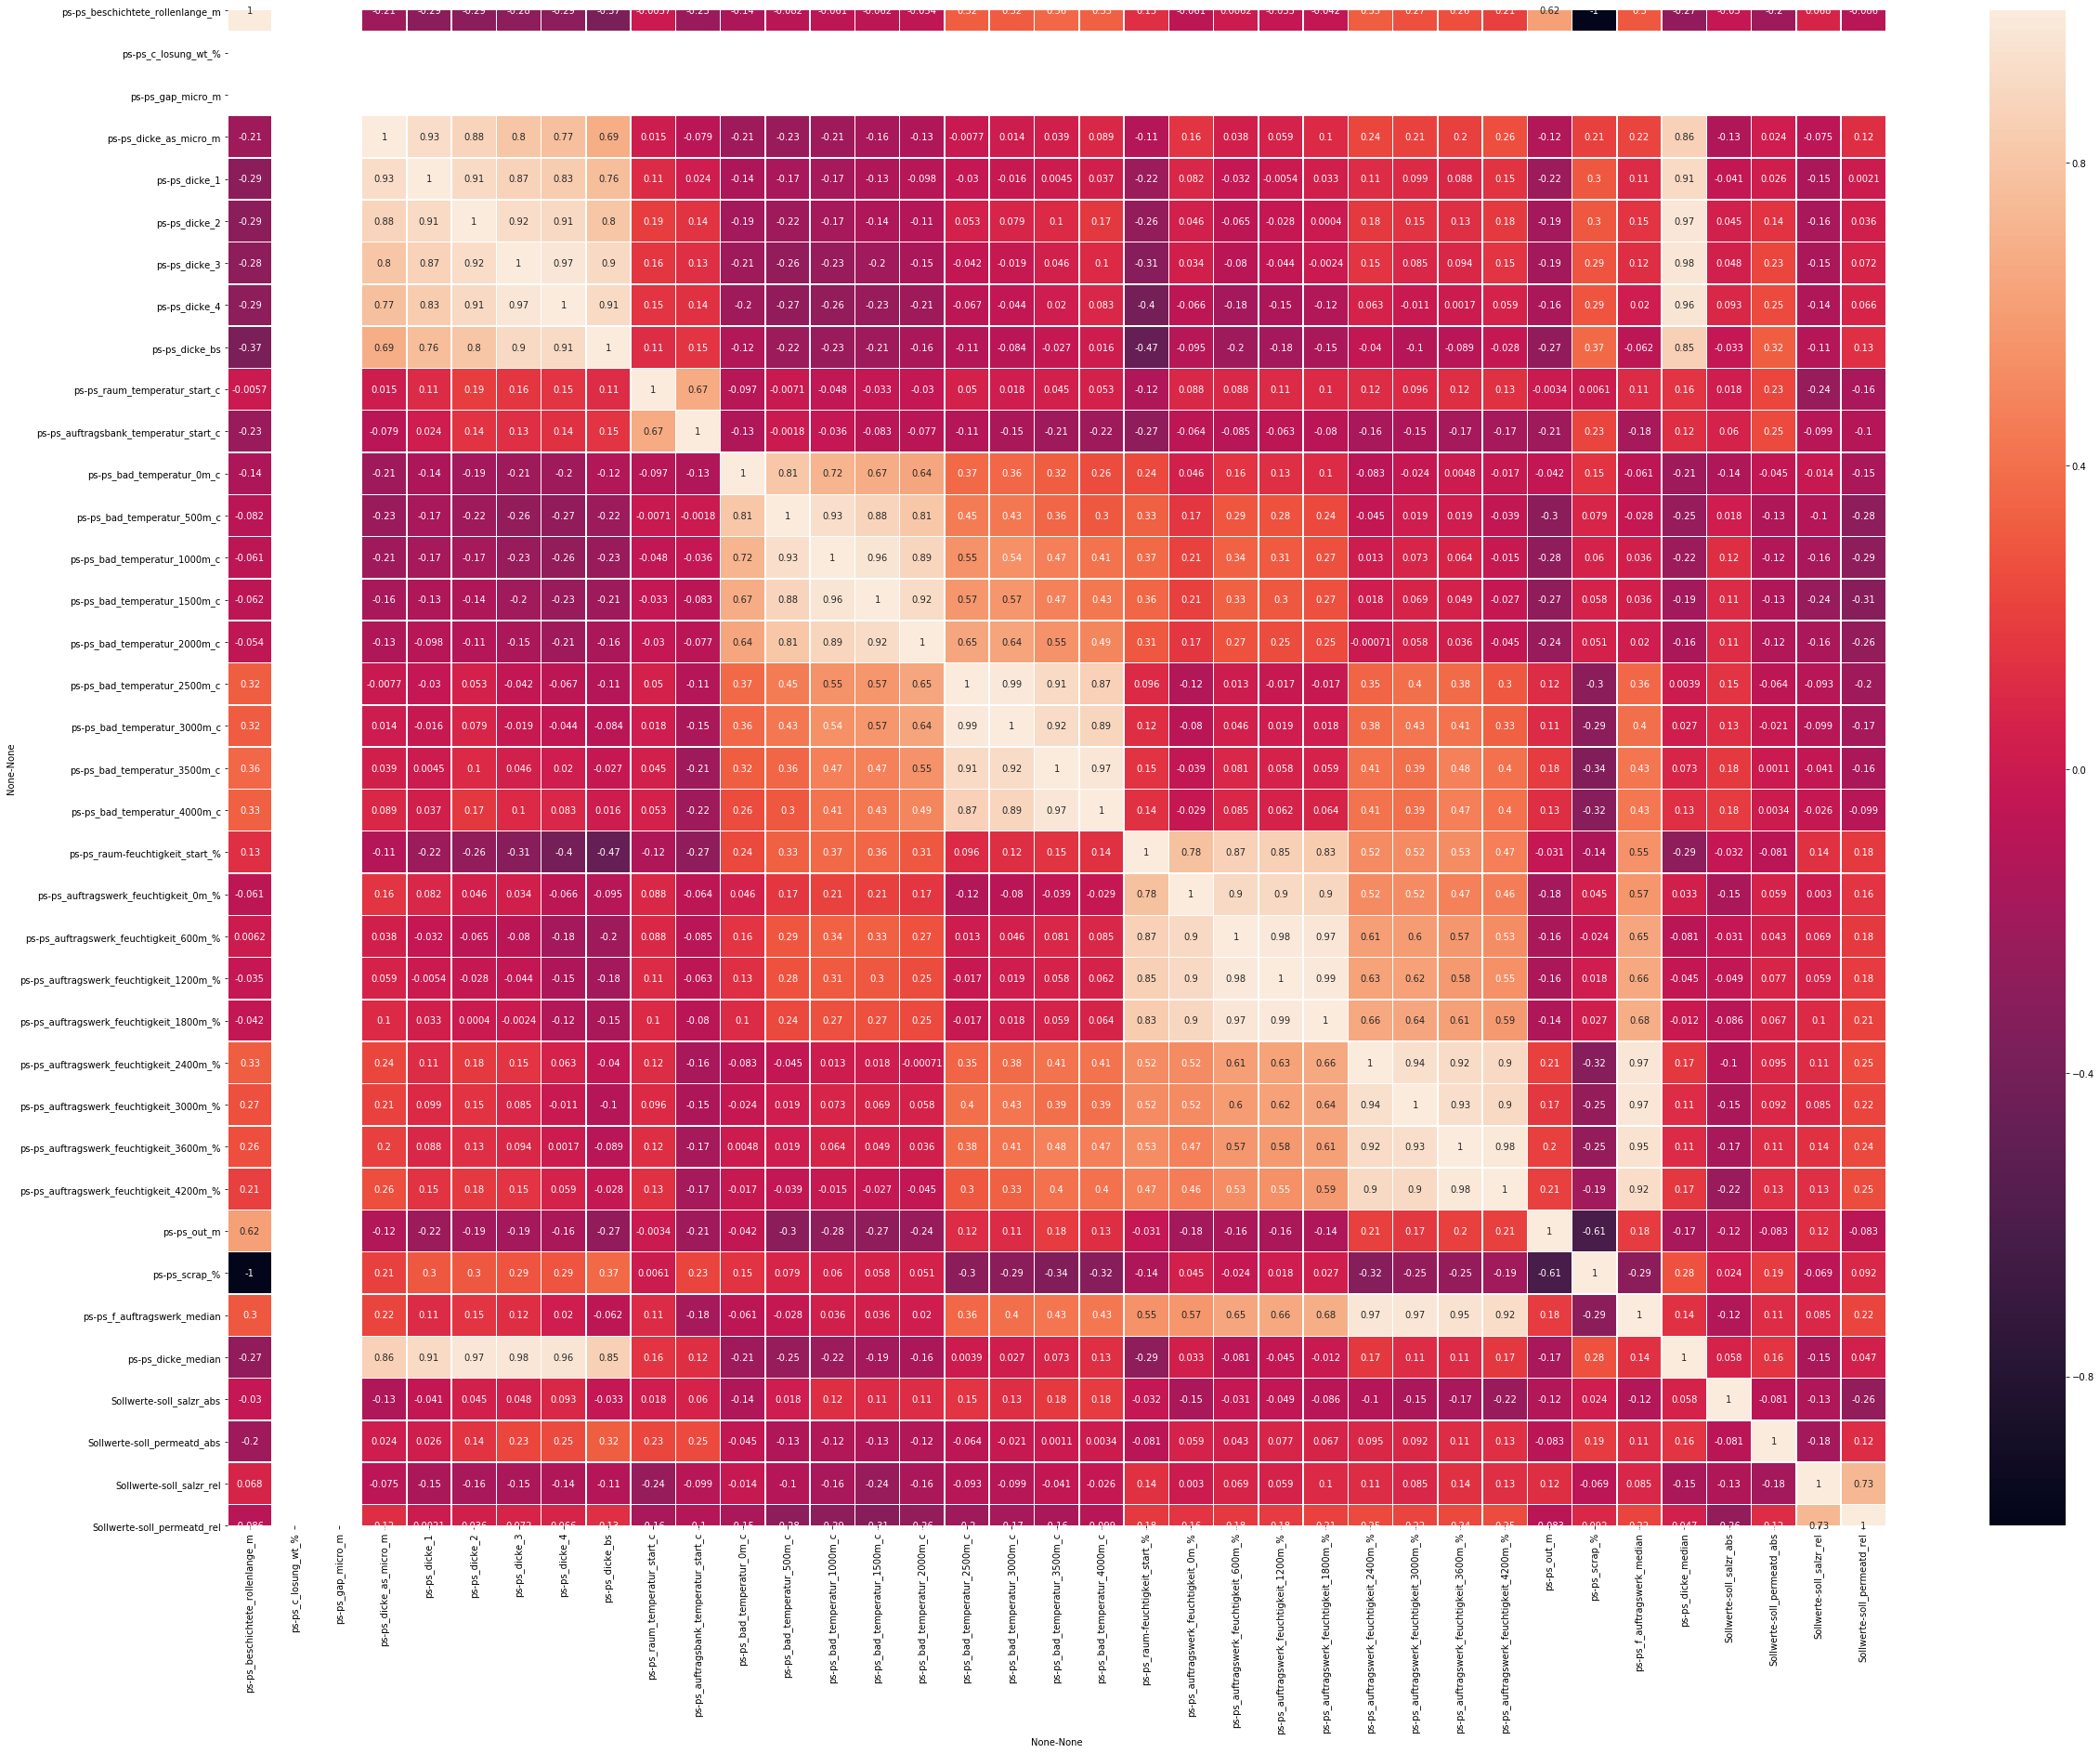

In [9]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(df3_ps.corr(method='spearman'), annot=True, linewidths=.5)
plt.savefig('df3_ps.pdf')

In [ ]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(df3_pa.corr(method='spearman'), annot=False, linewidths=.5)
plt.savefig('df3_pa.pdf')

In [ ]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(df3_ass.corr(method='spearman'), annot=False, linewidths=.5)
plt.savefig('df3_ass.pdf')

In [ ]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(df3_qc.corr(method='spearman'), annot=False, linewidths=.5)
plt.savefig('df3_qc.pdf')